## Model Evaluation

In [1]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/custom_train/weights/best.pt")  # Adjust path if needed

# Run validation to get metrics
metrics = model.val()

# Print key metrics
print(f"mAP50: {metrics.box.map:.4f}")
#print(f"mAP50-95: {metrics.box.map50_95:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")


Ultralytics 8.3.50  Python-3.10.12 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i9-12900)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\32573\Desktop\Sheel-Work\Odometer\dataset\val\labels.cache... 800 images, 32 backgrounds, 0 corr

val: WARNING  C:\Users\32573\Desktop\Sheel-Work\Odometer\dataset\val\images\scraped_B362xa_1654866600042.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:32


                   all        800       1535      0.954      0.979      0.984      0.717
              Odometer        767        767      0.954      0.977      0.988      0.689
                   LCD        768        768      0.954       0.98       0.98      0.744
Speed: 0.5ms preprocess, 28.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val3
mAP50: 0.7166
Precision: 0.9540
Recall: 0.9785


## Plots - Loss Curves

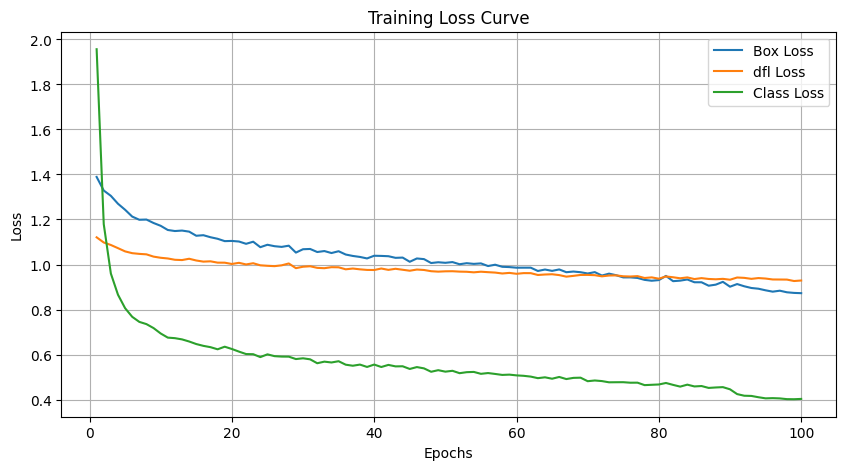

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load training logs
log_file = "runs/custom_train/results.csv"
df = pd.read_csv(log_file)

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="dfl Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show(block=True)


## Plot - mAP, Precision, and Recall

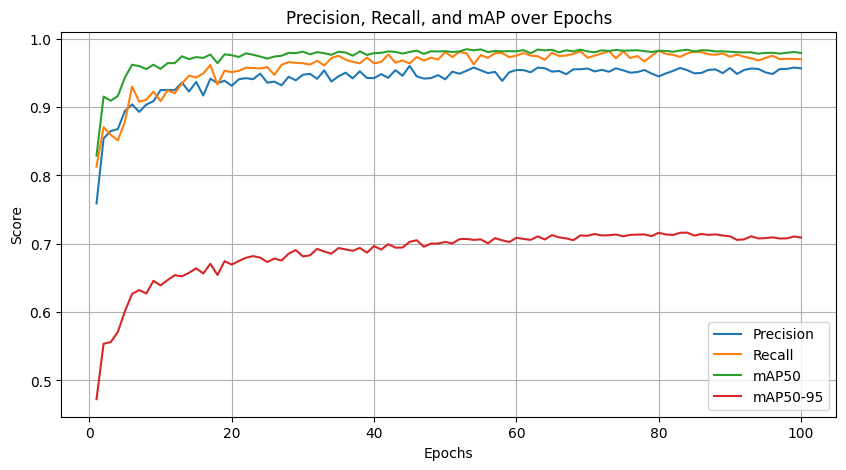

In [10]:
# Plot mAP, Precision, Recall
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Precision, Recall, and mAP over Epochs")
plt.legend()
plt.grid()
plt.show()


## Model Infernce

In [12]:
results = model("Samples/scraped_33G7jA_1654866880316.jpg")
results[0].show()  # Show output



image 1/1 C:\Users\32573\Desktop\Sheel-Work\Odometer\Samples\scraped_33G7jA_1654866880316.jpg: 384x640 1 Odometer, 1 LCD, 53.5ms
Speed: 1.3ms preprocess, 53.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
